# Predict Pneumonia with Chest X Ray Images Using a CNN

### Import required libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
import glob
import cv2
from PIL import Image

2024-10-26 09:04:20.348309: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


AttributeError: `np.complex_` was removed in the NumPy 2.0 release. Use `np.complex128` instead.

### Organizing the paths

In [2]:
#setting up the main folder

main_fol = "data/"

In [3]:
#train, test folders

train_folder = os.path.join(main_fol, "train")
test_folder = os.path.join(main_fol, "test")


In [4]:
#pneumonia and normal image paths

pneumonia_train_images = glob.glob(train_folder+"/PNEUMONIA/*.jpeg")
normal_train_images = glob.glob(train_folder+"/NORMAL/*.jpeg")

pneumonia_test_images = glob.glob(test_folder+"/PNEUMONIA/*.jpeg")
normal_test_images = glob.glob(test_folder+"/NORMAL/*.jpeg")

In [5]:
#creating training and test dataframes

train_list = [x for x in normal_train_images]
train_list.extend([x for x in pneumonia_train_images])

df_train = pd.DataFrame(np.concatenate([["Normal"]*len(normal_train_images),
                                       ["Pneumonia"]*len(pneumonia_train_images)]), columns=["class"])
df_train["image"] = [x for x in train_list]

test_list = [x for x in normal_test_images]
test_list.extend([x for x in pneumonia_test_images])

df_test = pd.DataFrame(np.concatenate([["Normal"]*len(normal_test_images),
                                      ["Pneumonia"]*len(pneumonia_test_images)]), columns=["class"])
df_test["image"] = [x for x in test_list]

In [6]:
df_train

,class,image
0,Normal,data/train/NORMAL/NORMAL2-IM-0927-0001.jpeg
1,Normal,data/train/NORMAL/NORMAL2-IM-1056-0001.jpeg
2,Normal,data/train/NORMAL/IM-0427-0001.jpeg
3,Normal,data/train/NORMAL/NORMAL2-IM-1260-0001.jpeg
4,Normal,data/train/NORMAL/IM-0656-0001-0001.jpeg
...,...,...
5211,Pneumonia,data/train/PNEUMONIA/person142_virus_288.jpeg
5212,Pneumonia,data/train/PNEUMONIA/person364_bacteria_1659.jpeg
5213,Pneumonia,data/train/PNEUMONIA/person1323_virus_2283.jpeg
5214,Pneumonia,data/train/PNEUMONIA/person772_virus_1401.jpeg


In [7]:
df_test

,class,image
0,Normal,data/test/NORMAL/IM-0031-0001.jpeg
1,Normal,data/test/NORMAL/IM-0025-0001.jpeg
2,Normal,data/test/NORMAL/NORMAL2-IM-0272-0001.jpeg
3,Normal,data/test/NORMAL/NORMAL2-IM-0102-0001.jpeg
4,Normal,data/test/NORMAL/NORMAL2-IM-0229-0001.jpeg
...,...,...
619,Pneumonia,data/test/PNEUMONIA/person120_bacteria_572.jpeg
620,Pneumonia,data/test/PNEUMONIA/person171_bacteria_826.jpeg
621,Pneumonia,data/test/PNEUMONIA/person109_bacteria_512.jpeg
622,Pneumonia,data/test/PNEUMONIA/person83_bacteria_410.jpeg


### Exploring the dataset

In [8]:
print(len(df_train))

5216


TypeError: countplot() got multiple values for argument 'data'

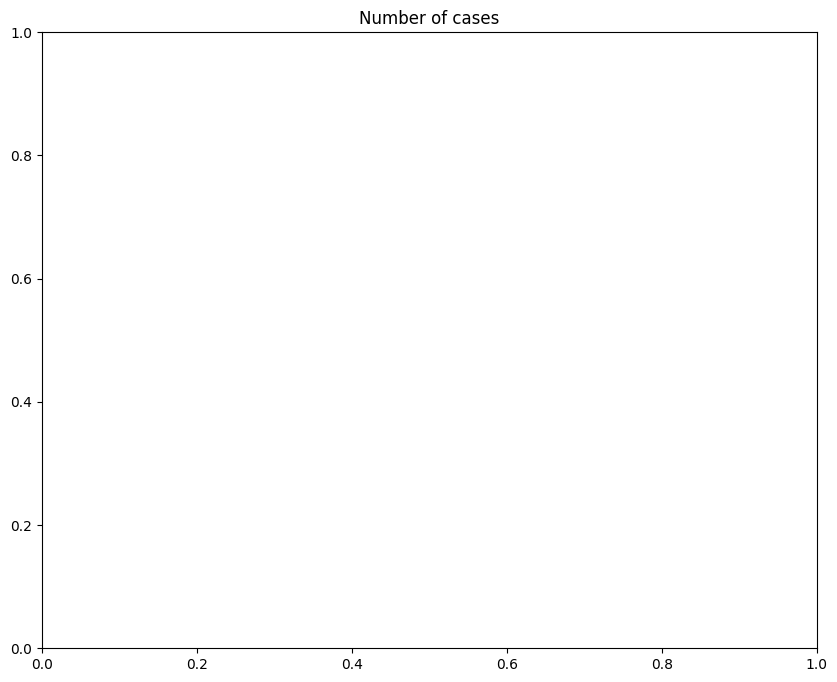

In [9]:
plt.figure(figsize=(10,8))

plt.title("Number of cases", fontsize=12)
sns.countplot(df_train["class"], data=df_train)

plt.show()

### Sample images

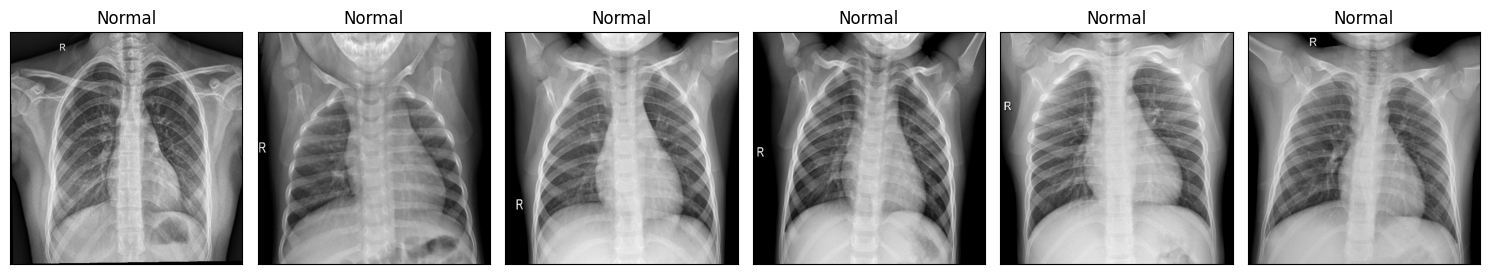

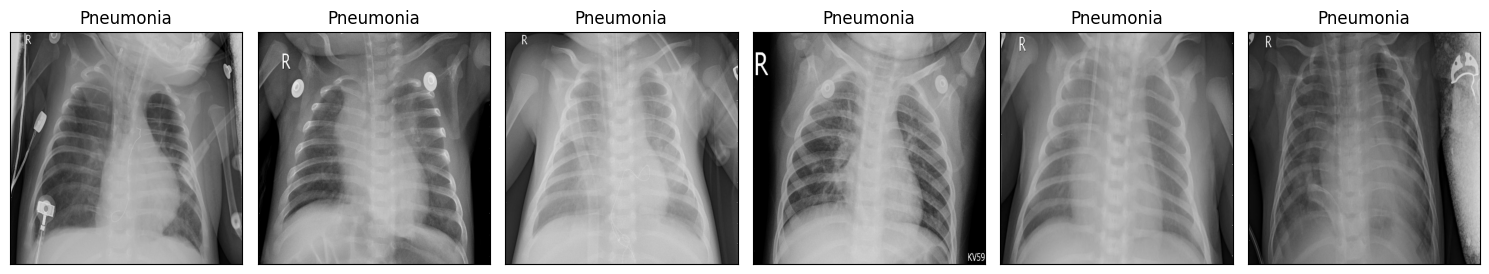

In [10]:
#normal images

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10))

for i, ax in enumerate(axes.flat):
    img = cv2.imread(normal_train_images[i])
    img = cv2.resize(img, (512,512))
    ax.imshow(img)
    ax.set_title("Normal")
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
plt.show()

#pneumonia images

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(15,10))

for i, ax in enumerate(axes.flat):
    img = cv2.imread(pneumonia_train_images[i])
    img = cv2.resize(img, (512,512))
    ax.imshow(img)
    ax.set_title("Pneumonia")
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
plt.show()

### Data Preparation

In [17]:
# from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tf.keras.preprocessing.image import ImageDataGenerator

AttributeError: `np.complex_` was removed in the NumPy 2.0 release. Use `np.complex128` instead.

In [18]:
train_datagen = ImageDataGenerator(
                rescale=1/255)

val_datagen = ImageDataGenerator(
                rescale=1/255)

NameError: name 'ImageDataGenerator' is not defined

In [14]:
train_generator = train_datagen.flow_from_dataframe(
                    train_df,
                    x_col="image",
                    y_col="class",
                    target_size=(150,150),
                    batch_size=32,
                    class_mode="binary",
                    seed=7)

Found 4185 validated image filenames belonging to 2 classes.


In [15]:
val_generator = val_datagen.flow_from_dataframe(
                    val_df,
                    x_col="image",
                    y_col="class",
                    target_size=(150,150),
                    batch_size=32,
                    class_mode="binary",
                    seed=7)

test_generator = val_datagen.flow_from_dataframe(
                    df_test,
                    x_col="image",
                    y_col="class",
                    target_size=(150,150),
                    batch_size=32,
                    class_mode="binary",
                    shuffle=False,
                    seed=7)

Found 1047 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.
